## NX31 Examproject

## Packages and extentions

In [29]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
import numpy as np
import scipy as sp
from scipy import linalg
from scipy import optimize
from scipy import interpolate
import sympy as sm
from IPython.display import display

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
sm.init_printing(use_unicode=True)

# 1. Human capital accumulation

Consider a worker living in **two periods**, $t \in \{1,2\}$. 

In each period she decides whether to **work ($l_t = 1$) or not ($l_t = 0$)**. 

She can *not* borrow or save and thus **consumes all of her income** in each period. 

If she **works** her **consumption** becomes:

$$c_t = w h_t l_t\,\,\text{if}\,\,l_t=1$$

where $w$ is **the wage rate** and $h_t$ is her **human capital**. 

If she does **not work** her consumption becomes:

$$c_t = b\,\,\text{if}\,\,l_t=0$$

where $b$ is the **unemployment benefits**.

Her **utility of consumption** is: 

$$ \frac{c_t^{1-\rho}}{1-\rho} $$

Her **disutility of working** is:

$$ \gamma l_t $$

From period 1 to period 2, she **accumulates human capital** according to:

$$ h_2 = h_1 + l_1 + 
\begin{cases}
0 & \text{with prob. }0.5 \\
\Delta & \text{with prob. }0.5 
\end{cases} \\
$$

where $\Delta$ is a **stochastic experience gain**.

In the **second period** the worker thus solves:

$$
\begin{eqnarray*}
v_{2}(h_{2}) & = &\max_{l_{2}} \frac{c_2^{1-\rho}}{1-\rho} - \gamma l_2
\\ & \text{s.t.} & \\
c_{2}& = & w h_2 l_2 \\
l_{2}& \in &\{0,1\}
\end{eqnarray*}
$$

In the **first period** the worker thus solves:

$$
\begin{eqnarray*}
v_{1}(h_{1}) &=& \max_{l_{1}} \frac{c_1^{1-\rho}}{1-\rho} - \gamma l_1 + \beta\mathbb{E}_{1}\left[v_2(h_2)\right]
\\ & \text{s.t.} & \\
c_1 &=& w h_1 l_1 \\
h_2 &=& h_1 + l_1 + \begin{cases}
0 & \text{with prob. }0.5\\
\Delta & \text{with prob. }0.5 
\end{cases}\\
l_{1} &\in& \{0,1\}\\
\end{eqnarray*}
$$

where $\beta$ is the **discount factor** and $\mathbb{E}_{1}\left[v_2(h_2)\right]$ is the **expected value of living in period two**.

The **parameters** of the model are:

In [31]:
rho = 2
beta = 0.96
gamma = 0.1
w = 2
b = 1
Delta = 0.1

The **relevant levels of human capital** are:

In [32]:
h_vec = np.linspace(0.1,1.5,100)

**Question 1:** Solve the model in period 2 and illustrate the solution (including labor supply as a function of human capital). 

**Question 2:** Solve the model in period 1 and illustrate the solution (including labor supply as a function of human capital). 

**Question 3:** Will the worker never work if her potential wage income is lower than the unemployment benefits she can get? Explain and illustrate why or why not.

## **Answer 1: Human capital accumulation**

Solving the model in period 2 and illustrating labor supply as a function of human capital.

First we set up the functions of the model, both for period one and period two.

In [33]:
def utility(c,rho):
    return c**(1-rho)/(1-rho)

def c(w,h,l,b):
    return w*h*l + b*(1-l)

def bequest(l,gamma):
    return gamma*l

def v2(w,h2,l2,b,rho,gamma):
    return utility(c(w,h2,l2,b),rho) - bequest(l2,gamma)

def v1(h1,l1,v2_interp,Delta,w,b,rho,gamma,beta):
    
    # a. v2 value, if no accumulation of humancapital
    h2_No = h1 + l1 + 0
    v2_No = v2_interp([h2_No])[0]
    
    # b. v2 value, if accumulation of human capital
    h2_Yes = h1 + l1 + Delta
    v2_Yes = v2_interp([h2_Yes])[0]
    
    # c. expected v2 value
    v2 = 0.5*v2_No + 0.5*v2_Yes
    
    # d. total value
    return utility(c(w,h1,l1,b),rho) - bequest(l1,gamma) + beta*v2

We now ready to solve Question 1.1.

## Question 1.1

Next we will define a function to solve the model for period 2.

In [34]:
def solve_period_2(rho,gamma,Delta):
    
    # Vectors
    l2_vec = np.empty(100)
    v2_vec = np.empty(100)
    
    # Solve for each h2
    for i,h2 in enumerate(h_vec):
        
        # to work or not to work; if utility is higher when not working, then you will not work, else you work
        if v2(w,h2,1,b,rho,gamma) < v2(w,h2,0,b,rho,gamma):
            l2_vec[i] = 0
        else:
            l2_vec[i] = 1
        
        v2_vec[i] = v2(w,h2,l2_vec[i],b,rho,gamma)
        
    return l2_vec, v2_vec

Using our vector for labor supply and vector utility for each value of human capital, we will solve and illustrate the solution.

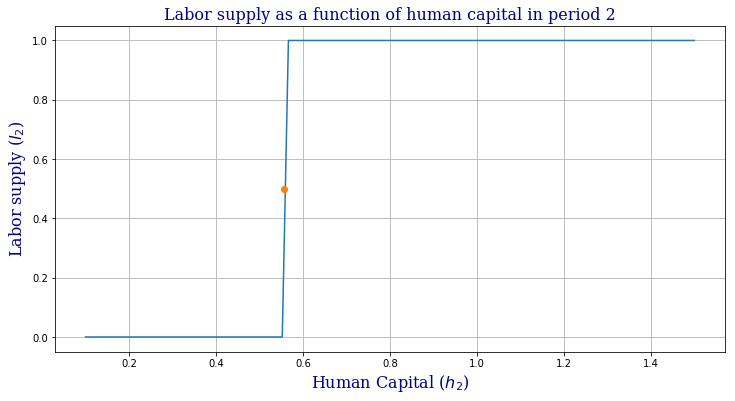

In [35]:
# Solving
l2_vec,v2_vec = solve_period_2(rho,gamma,Delta)

# Figure
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,1,1)
ax.plot(h_vec,l2_vec)

# Labels
font = {'family':'serif','color':'darkblue','weight':'normal','size': 16,}
ax.set_xlabel('Human Capital ($h_2$)', fontdict=font)
ax.set_ylabel('Labor supply ($l_2$)', fontdict=font)
ax.set_title('Labor supply as a function of human capital in period 2', fontdict=font)
ax.grid()
ax.plot(0.5555555555555556,0.5,marker='o')

We see that with low human capital you will decide not to work in period two, in fact you will only work if your level of human capital is over 0.5556.

Below we have quickly found the kink in human capital with a short analytical solution.

In [36]:
# Symbols
w = sm.symbols('w')
h_2 = sm.symbols('h_2')
rho = sm.symbols('rho')
gamma = sm.symbols('gamma')
v21 = sm.symbols('v_{2, l=1}')
v20 = sm.symbols('v_{2, l=0}')
b = sm.symbols('b')

Utility when working:


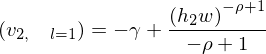

Utility whn not working:


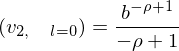

The kink in human capital is then where the two utilities are equal, so we set them equal and isolate h_2:


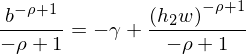

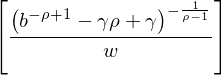

In [9]:
# Solves for the kink point in human capial i period 2
print(f'Utility when working:')
v_21 = (w*h_2*1)**(1-rho)/(1-rho)-gamma
display(sm.Eq(v21,v_21))
print(f'Utility whn not working:')
v_20 = b**(1-rho)/(1-rho)
display(sm.Eq(v20,v_20))
print(f'The kink in human capital is then where the two utilities are equal, so we set them equal and isolate h_2:')
display(sm.Eq(v_20,v_21))
f = v_21-v_20
fs = sm.solve(f,h_2)
fs

In [37]:
rho = 2
beta = 0.96
gamma = 0.1
w = 2
b = 1
[(b**(-rho + 1) - gamma*rho + gamma)**(-1/(rho - 1))/w]

This result match the illustration above.

### Question 1.2

We will now solve the model for period one.

In [38]:
# Construct interpolator
v2_interp = interpolate.RegularGridInterpolator((h_vec,), v2_vec, bounds_error=False, fill_value=None)

def solve_period_1(rho,gamma,beta,Delta,v1,v2_interp):
    
    # Vectors
    l1_vec = np.empty(100)
    v1_vec = np.empty(100)
    
    # Solve for each h1
    for i,h1 in enumerate(h_vec):
             
        # to work or not to work; if utility is higher when not working, then you will not work, else you work
        if v1(h1,1,v2_interp,Delta,w,b,rho,gamma,beta) < v1(h1,0,v2_interp,Delta,w,b,rho,gamma,beta):
            l1_vec[i] = 0
        else:
            l1_vec[i] = 1
        
        v1_vec[i] = v1(h1,l1_vec[i],v2_interp,Delta,w,b,rho,gamma,beta)
        
    return l1_vec, v1_vec

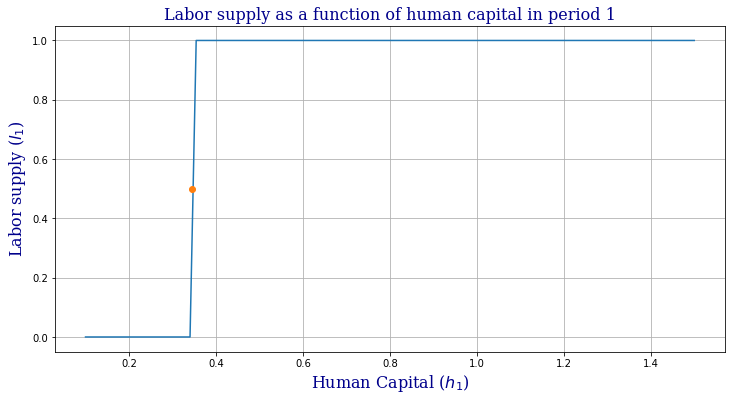

In [39]:
# Solving
l1_vec,v1_vec = solve_period_1(rho,gamma,beta,Delta,v1,v2_interp)

# Figure
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,1,1)
ax.plot(h_vec,l1_vec)

# Labels
font = {'family':'serif','color':'darkblue','weight':'normal','size': 16,}
ax.set_xlabel('Human Capital ($h_1$)', fontdict=font)
ax.set_ylabel('Labor supply ($l_1$)', fontdict=font)
ax.set_title('Labor supply as a function of human capital in period 1', fontdict=font)
ax.grid()
ax.plot(0.345,0.5,marker='o') # guess

We see again that with low human capital you will decide not to work in period two, in fact you will only work if your level of human capital is over 0.345.

Below we have quickly found the kink in human capital with a short analytical solution.

In [40]:
# Symbols
w = sm.symbols('w')
h_1 = sm.symbols('h_1')
rho = sm.symbols('rho')
gamma = sm.symbols('gamma')
v11 = sm.symbols('v_{1, l=1}')
v10 = sm.symbols('v_{1, l=0}')
b = sm.symbols('b')
beta = sm.symbols('beta')
v2 = sm.symbols('E{[v_2]}')

Utility when working:


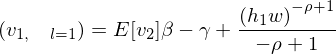

Utility whn not working:


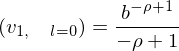

The kink in human capital is then where the two utilities are equal, so we set them equal and isolate h_2:


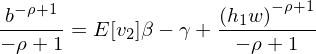

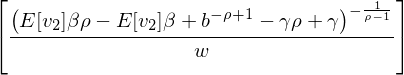

In [41]:
# Solves for the kink point in human capial i period 2
print(f'Utility when working:')
v_11 = (w*h_1*1)**(1-rho)/(1-rho)-gamma+beta*v2
display(sm.Eq(v11,v_11))
print(f'Utility whn not working:')
v_10 = b**(1-rho)/(1-rho)
display(sm.Eq(v10,v_10))
print(f'The kink in human capital is then where the two utilities are equal, so we set them equal and isolate h_2:')
display(sm.Eq(v_10,v_11))
f1 = v_11-v_10
f1s = sm.solve(f1,h_1)
f1s

In [79]:
# Breakeven human capital in period 2
rho = 2
beta = 0.96
gamma = 0.1
w = 2
b = 1
h2 = (b**(-rho + 1) - gamma*rho + gamma)**(-1/(rho - 1))/w


In [80]:
#Expected v_2
v2 = (w*h2*1)**(1-rho)/(1-rho)-gamma
v2

In [81]:
# Breakeven human capital period 1
((v2*beta*rho - v2*beta + (b**(-rho + 1)) - gamma*rho + gamma)**(-1/(rho - 1)))/w

This is not correct, but the illustration is.

### Question 1.3

"

**Question 3:** Will the worker never work if her potential wage income is lower than the unemployment benefits she can get? Explain and illustrate why or why not.

"

Plot wage på x of labor sup på y...

# 2. AS-AD model

Consider the following **AS-AD model**. The **goods market equilibrium** is given by

$$ y_{t} = -\alpha r_{t} + v_{t} $$

where $y_{t}$ is the **output gap**, $r_{t}$ is the **ex ante real interest** and $v_{t}$ is a **demand disturbance**. 

The central bank's **Taylor rule** is

$$ i_{t} = \pi_{t+1}^{e} + h \pi_{t} + b y_{t}$$

where $i_{t}$ is the **nominal interest rate**, $\pi_{t}$ is the **inflation gap**, and $\pi_{t+1}^{e}$ is the **expected inflation gap**. 

The **ex ante real interest rate** is given by 

$$ r_{t} = i_{t} - \pi_{t+1}^{e} $$

Together, the above implies that the **AD-curve** is

$$ \pi_{t} = \frac{1}{h\alpha}\left[v_{t} - (1+b\alpha)y_{t}\right]$$

Further, assume that the **short-run supply curve (SRAS)** is given by

$$ \pi_{t} = \pi_{t}^{e} + \gamma y_{t} + s_{t}$$

where $s_t$ is a **supply disturbance**.

**Inflation expectations are adaptive** and given by

$$ \pi_{t}^{e} = \phi\pi_{t-1}^{e} + (1-\phi)\pi_{t-1}$$

Together, this implies that the **SRAS-curve** can also be written as

$$ \pi_{t} = \pi_{t-1} + \gamma y_{t} - \phi\gamma y_{t-1} + s_{t} - \phi s_{t-1} $$

The **parameters** of the model are:

In [18]:
par = {}

par['alpha'] = 5.76
par['h'] = 0.5
par['b'] = 0.5
par['phi'] = 0
par['gamma'] = 0.075

**Question 1:** Use the ``sympy`` module to solve for the equilibrium values of output, $y_t$, and inflation, $\pi_t$, (where AD = SRAS) given the parameters ($\alpha$, $h$, $b$, $\alpha$, $\gamma$) and $y_{t-1}$ , $\pi_{t-1}$, $v_t$, $s_t$, and $s_{t-1}$.

**Question 2:** Find and illustrate the equilibrium when $y_{t-1} = \pi_{t-1} = v_t = s_t = s_{t-1} = 0$. Illustrate how the equilibrium changes when instead $v_t = 0.1$.

**Persistent disturbances:** Now, additionaly, assume that both the demand and the supply disturbances are AR(1) processes

$$ v_{t} = \delta v_{t-1} + x_{t} $$
$$ s_{t} = \omega s_{t-1} + c_{t} $$

where $x_{t}$ is a **demand shock**, and $c_t$ is a **supply shock**. The **autoregressive parameters** are:

In [19]:
par['delta'] = 0.80
par['omega'] = 0.15

**Question 3:** Starting from $y_{-1} = \pi_{-1} = s_{-1} = 0$, how does the economy evolve for $x_0 = 0.1$, $x_t = 0, \forall t > 0$ and $c_t = 0, \forall t \geq 0$?

**Stochastic shocks:** Now, additionally, assume that $x_t$ and $c_t$ are stochastic and normally distributed

$$ x_{t}\sim\mathcal{N}(0,\sigma_{x}^{2}) $$
$$ c_{t}\sim\mathcal{N}(0,\sigma_{c}^{2}) $$

The **standard deviations of the shocks** are:

In [20]:
par['sigma_x'] = 3.492
par['sigma_c'] = 0.2

**Question 4:** Simulate the AS-AD model for 1,000 periods. Calculate the following five statistics:

1. Variance of $y_t$, $var(y_t)$
2. Variance of $\pi_t$, $var(\pi_t)$
3. Correlation between $y_t$ and $\pi_t$, $corr(y_t,\pi_t)$
4. Auto-correlation between $y_t$ and $y_{t-1}$, $corr(y_t,y_{t-1})$
5. Auto-correlation between $\pi_t$ and $\pi_{t-1}$, $corr(\pi_t,\pi_{t-1})$

**Question 5:** Plot how the correlation between $y_t$ and $\pi_t$ changes with $\phi$. Use a numerical optimizer or root finder to choose $\phi\in(0,1)$ such that the simulated correlation between $y_t$ and $\pi_t$ comes close to 0.31. 

**Quesiton 6:** Use a numerical optimizer to choose $\sigma_x>0$, $\sigma_c>0$ and $\phi\in(0,1)$ to make the simulated statistics as close as possible to US business cycle data where:

1. $var(y_t) = 1.64$
2. $var(\pi_t) = 0.21$
3. $corr(y_t,\pi_t) = 0.31$
4. $corr(y_t,y_{t-1}) = 0.84$
5. $corr(\pi_t,\pi_{t-1}) = 0.48$

# 3. Exchange economy

Consider an **exchange economy** with

1. 3 goods, $(x_1,x_2,x_3)$
2. $N$ consumers indexed by \\( j \in \{1,2,\dots,N\} \\)
3. Preferences are Cobb-Douglas with log-normally distributed coefficients

    $$ \begin{eqnarray*}
    u^{j}(x_{1},x_{2},x_{3}) &=& 
    \left(x_{1}^{\beta_{1}^{j}}x_{2}^{\beta_{2}^{j}}x_{3}^{\beta_{3}^{j}}\right)^{\gamma}\\
     &  & \,\,\,\beta_{i}^{j}=\frac{\alpha_{i}^{j}}{\alpha_{1}^{j}+\alpha_{2}^{j}+\alpha_{3}^{j}} \\
     &  & \,\,\,\boldsymbol{\alpha}^{j}=(\alpha_{1}^{j},\alpha_{2}^{j},\alpha_{3}^{j}) \\ 
     &  & \,\,\,\log(\boldsymbol{\alpha}^j) \sim \mathcal{N}(\mu,\Sigma) \\
    \end{eqnarray*} $$

4. Endowments are exponentially distributed,

$$
\begin{eqnarray*}
\boldsymbol{e}^{j} &=& (e_{1}^{j},e_{2}^{j},e_{3}^{j}) \\
 &  & e_i^j \sim f, f(z;\zeta) =  1/\zeta \exp(-z/\zeta)
\end{eqnarray*}
$$

Let $p_3 = 1$ be the **numeraire**. The implied **demand functions** are:

$$
\begin{eqnarray*}
x_{i}^{\star j}(p_{1},p_{2},\boldsymbol{e}^{j})&=&\beta^{j}_i\frac{I^j}{p_{i}} \\
\end{eqnarray*}
$$

where consumer $j$'s income is

$$I^j = p_1 e_1^j + p_2 e_2^j +p_3 e_3^j$$

The **parameters** and **random preferences and endowments** are given by:

In [21]:
# a. parameters
N = 50000
mu = np.array([3,2,1])
Sigma = np.array([[0.25, 0, 0], [0, 0.25, 0], [0, 0, 0.25]])
gamma = 0.8
zeta = 1

# b. random draws
seed = 1986
np.random.seed(seed)

# preferences
alphas = np.exp(np.random.multivariate_normal(mu, Sigma, size=N))
betas = alphas/np.reshape(np.sum(alphas,axis=1),(N,1))

# endowments
e1 = np.random.exponential(zeta,size=N)
e2 = np.random.exponential(zeta,size=N)
e3 = np.random.exponential(zeta,size=N)

**Question 1:** Plot the histograms of the budget shares for each good across agents.

Consider the **excess demand functions:**

$$ z_i(p_1,p_2) = \sum_{j=1}^N x_{i}^{\star j}(p_{1},p_{2},\boldsymbol{e}^{j}) - e_i^j$$

**Question 2:** Plot the excess demand functions.

**Quesiton 3:** Find the Walras-equilibrium prices, $(p_1,p_2)$, where both excess demands are (approximately) zero, e.g. by using the following tâtonnement process:

1. Guess on $p_1 > 0$, $p_2 > 0$ and choose tolerance $\epsilon > 0$ and adjustment aggressivity parameter, $\kappa > 0$.
2. Calculate $z_1(p_1,p_2)$ and $z_2(p_1,p_2)$.
3. If $|z_1| < \epsilon$ and $|z_2| < \epsilon$ then stop.
4. Else set $p_1 = p_1 + \kappa \frac{z_1}{N}$ and $p_2 = p_2 + \kappa \frac{z_2}{N}$ and return to step 2.

**Question 4:** Plot the distribution of utility in the Walras-equilibrium and calculate its mean and variance.

**Question 5:** Find the Walras-equilibrium prices if instead all endowments were distributed equally. Discuss the implied changes in the distribution of utility. Does the value of $\gamma$ play a role for your conclusions?